In [432]:
import pandas as pd

In [433]:
df = pd.read_excel('/Users/majdshamashan/Desktop/Thesis/green_h2_policy_2024.xlsx')
df

,Country,Status,Sector,Programme,Instrument_type,Push_Pull,Amount_USD_mn,Description
0,Australia,In force,Hubs,Regional Hydrogen Hubs Programme,Grant,Pull,324.0,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...
1,Australia,Announced,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,Push,2000.0,"Finance in the form of debt, equity and guaran..."
2,Australia,Announced,Industry,Future Made in Australia programme,Tax credit,Push,10000.0,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...
3,Australia,In force,Industry,the Australian Headstart programme,CfD,Pull,2600.0,For projects with a cumulative electrolyser ca...
4,Australia,Announced,Industry,Future Made in Australia Innovation Fund,Grant,Push,1200.0,Includes “green” metals and low-carbon liquid ...
...,...,...,...,...,...,...,...,...
61,United States,In force,Electrolyser manufacturing,DOE Hydrogen Program,Grant,Push,750.0,For 52 hydrogen projects in manufacturing elec...
62,United States,In force,Electrolyser manufacturing,Qualifying Advanced Energy Project Credit (48C...,Tax credit,Push,326.0,For eight projects warded in 2024.
63,United States,In force,RD&D funding,NaN,Grant,Push,430.0,An increase from USD 150 mn funding in 2021
64,United States,In force,Hydrogen demonstration,NaN,Grant,Push,99.5,For R&D projects for heavy-duty refuelling sta...


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          66 non-null     object 
 1   Status           66 non-null     object 
 2   Sector           66 non-null     object 
 3   Programme        39 non-null     object 
 4   Instrument_type  66 non-null     object 
 5   Push_Pull        66 non-null     object 
 6   Amount_USD_mn    66 non-null     float64
 7   Description      66 non-null     object 
dtypes: float64(1), object(7)
memory usage: 4.3+ KB


In [435]:
df.describe()

,Amount_USD_mn
count,66.000000
mean,3381.765152
std,12561.465186
min,1.000000
25%,217.500000
50%,597.000000
75%,1650.000000
max,100000.000000


In [436]:
df['Instrument_type'].value_counts()

Instrument_type
Grant                 42
Competitve bidding     9
CfD                    6
Tax credit             5
Loan/guarantee         4
Name: count, dtype: int64

In [437]:
import numpy as np
import pandas as pd

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

In [438]:
df['Instrument_type'].unique()

array(['Grant', 'Loan/guarantee', 'Tax credit', 'CfD',
       'Competitve bidding'], dtype=object)

In [439]:
df['Instrument_type'].value_counts(dropna=False)

Instrument_type
Grant                 42
Competitve bidding     9
CfD                    6
Tax credit             5
Loan/guarantee         4
Name: count, dtype: int64

In [440]:
gh = df

In [441]:
gh.isnull().sum()

Country             0
Status              0
Sector              0
Programme          27
Instrument_type     0
Push_Pull           0
Amount_USD_mn       0
Description         0
dtype: int64

In [442]:
gh = gh.rename(columns={'Push_Pull':'Policy_side'})

In [443]:
gh.head()

,Country,Status,Sector,Programme,Instrument_type,Policy_side,Amount_USD_mn,Description
0,Australia,In force,Hubs,Regional Hydrogen Hubs Programme,Grant,Pull,324.0,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...
1,Australia,Announced,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,Push,2000.0,"Finance in the form of debt, equity and guaran..."
2,Australia,Announced,Industry,Future Made in Australia programme,Tax credit,Push,10000.0,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...
3,Australia,In force,Industry,the Australian Headstart programme,CfD,Pull,2600.0,For projects with a cumulative electrolyser ca...
4,Australia,Announced,Industry,Future Made in Australia Innovation Fund,Grant,Push,1200.0,Includes “green” metals and low-carbon liquid ...


In [444]:
gh['Status'].unique()

array(['In force', 'Announced', 'In force '], dtype=object)

In [445]:
gh['Status'] = gh['Status'].replace({'In force ':'In force'})

In [446]:
gh['Policy_side'].unique()

array(['Pull', 'Push ', 'Push'], dtype=object)

In [447]:
gh['Policy_side'] = gh['Policy_side'].replace({'Push ':'Push'})

In [448]:
gh['Policy_side'].unique()

array(['Pull', 'Push'], dtype=object)

In [449]:
gh['Instrument_type'].unique()

array(['Grant', 'Loan/guarantee', 'Tax credit', 'CfD',
       'Competitve bidding'], dtype=object)

In [450]:
gh_subset = pd.get_dummies(gh, drop_first=True, columns=['Status', 'Policy_side'])

In [451]:
gh_subset.head()

,Country,Sector,Programme,Instrument_type,Amount_USD_mn,Description,Status_In force,Policy_side_Push
0,Australia,Hubs,Regional Hydrogen Hubs Programme,Grant,324.0,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...,True,False
1,Australia,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,2000.0,"Finance in the form of debt, equity and guaran...",False,True
2,Australia,Industry,Future Made in Australia programme,Tax credit,10000.0,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...,False,True
3,Australia,Industry,the Australian Headstart programme,CfD,2600.0,For projects with a cumulative electrolyser ca...,True,False
4,Australia,Industry,Future Made in Australia Innovation Fund,Grant,1200.0,Includes “green” metals and low-carbon liquid ...,False,True


In [452]:
gh_subset['Status_In force'] = gh_subset['Status_In force'].astype(int)
gh_subset['Policy_side_Push'] = gh_subset['Policy_side_Push'].astype(int)


In [453]:
gh_subset.head()

,Country,Sector,Programme,Instrument_type,Amount_USD_mn,Description,Status_In force,Policy_side_Push
0,Australia,Hubs,Regional Hydrogen Hubs Programme,Grant,324.0,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...,1,0
1,Australia,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,2000.0,"Finance in the form of debt, equity and guaran...",0,1
2,Australia,Industry,Future Made in Australia programme,Tax credit,10000.0,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...,0,1
3,Australia,Industry,the Australian Headstart programme,CfD,2600.0,For projects with a cumulative electrolyser ca...,1,0
4,Australia,Industry,Future Made in Australia Innovation Fund,Grant,1200.0,Includes “green” metals and low-carbon liquid ...,0,1


In [454]:
gh.head()

,Country,Status,Sector,Programme,Instrument_type,Policy_side,Amount_USD_mn,Description
0,Australia,In force,Hubs,Regional Hydrogen Hubs Programme,Grant,Pull,324.0,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...
1,Australia,Announced,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,Push,2000.0,"Finance in the form of debt, equity and guaran..."
2,Australia,Announced,Industry,Future Made in Australia programme,Tax credit,Push,10000.0,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...
3,Australia,In force,Industry,the Australian Headstart programme,CfD,Pull,2600.0,For projects with a cumulative electrolyser ca...
4,Australia,Announced,Industry,Future Made in Australia Innovation Fund,Grant,Push,1200.0,Includes “green” metals and low-carbon liquid ...


In [455]:
gh_subset = pd.get_dummies(gh_subset, drop_first=True, columns=['Instrument_type'])

In [456]:
gh_subset.head()

,Country,Sector,Programme,Amount_USD_mn,Description,Status_In force,Policy_side_Push,Instrument_type_Competitve bidding,Instrument_type_Grant,Instrument_type_Loan/guarantee,Instrument_type_Tax credit
0,Australia,Hubs,Regional Hydrogen Hubs Programme,324.0,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...,1,0,False,True,False,False
1,Australia,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,2000.0,"Finance in the form of debt, equity and guaran...",0,1,False,False,True,False
2,Australia,Industry,Future Made in Australia programme,10000.0,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...,0,1,False,False,False,True
3,Australia,Industry,the Australian Headstart programme,2600.0,For projects with a cumulative electrolyser ca...,1,0,False,False,False,False
4,Australia,Industry,Future Made in Australia Innovation Fund,1200.0,Includes “green” metals and low-carbon liquid ...,0,1,False,True,False,False


In [457]:
gh_subset['Instrument_type_Competitve bidding'] = gh_subset['Instrument_type_Competitve bidding'].astype(int)
gh_subset['Instrument_type_Grant'] = gh_subset['Instrument_type_Grant'].astype(int)
gh_subset['Instrument_type_Loan/guarantee'] = gh_subset['Instrument_type_Loan/guarantee'].astype(int)
gh_subset['Instrument_type_Tax credit'] = gh_subset['Instrument_type_Tax credit'].astype(int)



In [458]:
gh_subset.head()

,Country,Sector,Programme,Amount_USD_mn,Description,Status_In force,Policy_side_Push,Instrument_type_Competitve bidding,Instrument_type_Grant,Instrument_type_Loan/guarantee,Instrument_type_Tax credit
0,Australia,Hubs,Regional Hydrogen Hubs Programme,324.0,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...,1,0,0,1,0,0
1,Australia,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,2000.0,"Finance in the form of debt, equity and guaran...",0,1,0,0,1,0
2,Australia,Industry,Future Made in Australia programme,10000.0,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...,0,1,0,0,0,1
3,Australia,Industry,the Australian Headstart programme,2600.0,For projects with a cumulative electrolyser ca...,1,0,0,0,0,0
4,Australia,Industry,Future Made in Australia Innovation Fund,1200.0,Includes “green” metals and low-carbon liquid ...,0,1,0,1,0,0


In [459]:
X = gh_subset.drop(['Country', 'Sector', 'Programme', 'Description'], axis=1)

In [460]:
X.head()

,Amount_USD_mn,Status_In force,Policy_side_Push,Instrument_type_Competitve bidding,Instrument_type_Grant,Instrument_type_Loan/guarantee,Instrument_type_Tax credit
0,324.0,1,0,0,1,0,0
1,2000.0,0,1,0,0,1,0
2,10000.0,0,1,0,0,0,1
3,2600.0,1,0,0,0,0,0
4,1200.0,0,1,0,1,0,0


In [461]:
X_scaled = StandardScaler().fit_transform(X)

In [462]:
df2 = pd.DataFrame(X_scaled)
df2.head()

,0,1,2,3,4,5,6
0,-0.245290,0.68313,-1.632993,-0.39736,0.755929,-0.254000,-0.286299
1,-0.110843,-1.46385,0.612372,-0.39736,-1.322876,3.937004,-0.286299
2,0.530905,-1.46385,0.612372,-0.39736,-1.322876,-0.254000,3.492850
3,-0.062712,0.68313,-1.632993,-0.39736,-1.322876,-0.254000,-0.286299
4,-0.175018,-1.46385,0.612372,-0.39736,0.755929,-0.254000,-0.286299


In [463]:
num_clusters = [i for i in range(2, 13)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints. 
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [464]:
inertia = kmeans_inertia(num_clusters, X_scaled)

In [465]:
inertia

[379.7041249169205,
 327.898195831211,
 252.1360767218709,
 176.45205174242201,
 108.71568320664795,
 73.49748636571175,
 44.62078359270127,
 38.84018658718767,
 24.991095172189404,
 18.074064562762256,
 13.283951496078002]

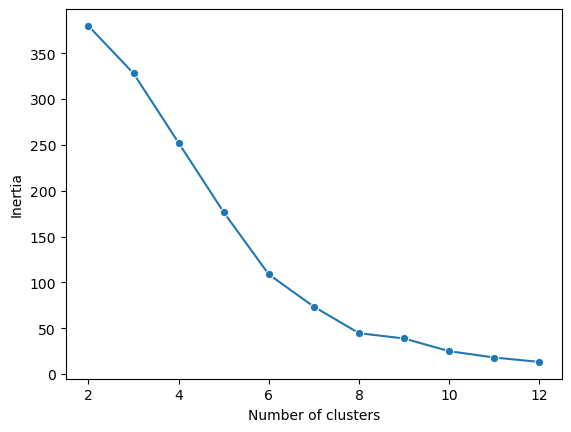

In [466]:
plot = sns.lineplot(x=num_clusters, y=inertia, marker='o')
plot.set_xlabel('Number of clusters');
plot.set_ylabel('Inertia');

In [467]:
def kmeans_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value. 
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.32745946728511116,
 0.32309652498884406,
 0.35355606019633756,
 0.4409332363784453,
 0.5353741213056737,
 0.6767301376921128,
 0.7416343641106488,
 0.7715328882598952,
 0.8073771406256366,
 0.8442997810682958,
 0.8699010348973645]

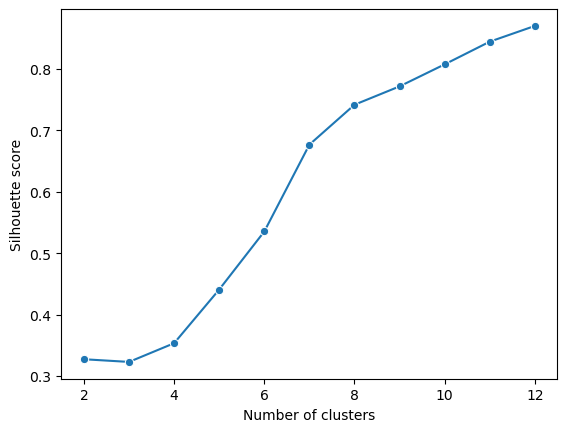

In [468]:
plot = sns.lineplot(x=num_clusters, y=sil_score, marker='o')
plot.set_xlabel('Number of clusters');
plot.set_ylabel('Silhouette score');

In [469]:
gh.shape

(66, 8)

In [470]:
kmeans8 = KMeans(n_clusters=8, random_state=42)
kmeans8.fit(X_scaled)

KMeans(random_state=42)

In [471]:
print('Unique labels:', np.unique(kmeans8.labels_))

Unique labels: [0 1 2 3 4 5 6 7]


In [472]:
gh['cluster'] = kmeans8.labels_
gh.head()

,Country,Status,Sector,Programme,Instrument_type,Policy_side,Amount_USD_mn,Description,cluster
0,Australia,In force,Hubs,Regional Hydrogen Hubs Programme,Grant,Pull,324.0,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...,7
1,Australia,Announced,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,Push,2000.0,"Finance in the form of debt, equity and guaran...",5
2,Australia,Announced,Industry,Future Made in Australia programme,Tax credit,Push,10000.0,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...,4
3,Australia,In force,Industry,the Australian Headstart programme,CfD,Pull,2600.0,For projects with a cumulative electrolyser ca...,7
4,Australia,Announced,Industry,Future Made in Australia Innovation Fund,Grant,Push,1200.0,Includes “green” metals and low-carbon liquid ...,6


In [473]:
gh.groupby(by=['cluster', 'Instrument_type']).size()

cluster  Instrument_type   
0        CfD                    2
         Grant                  4
1        Grant                 25
2        Competitve bidding     9
3        Tax credit             1
4        Tax credit             4
5        Loan/guarantee         4
6        Grant                 11
7        CfD                    4
         Grant                  2
dtype: int64

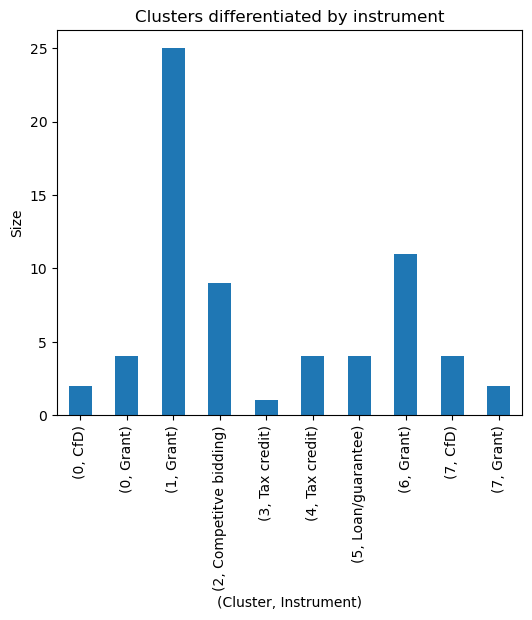

In [474]:
gh.groupby(by=['cluster', 'Instrument_type']).size().plot.bar(title='Clusters differentiated by instrument',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Instrument)');

In [475]:
gh.groupby(by=['cluster', 'Instrument_type', 'Status']).size()

cluster  Instrument_type     Status   
0        CfD                 Announced     2
         Grant               Announced     4
1        Grant               In force     25
2        Competitve bidding  Announced     2
                             In force      7
3        Tax credit          In force      1
4        Tax credit          Announced     1
                             In force      3
5        Loan/guarantee      Announced     1
                             In force      3
6        Grant               Announced    11
7        CfD                 In force      4
         Grant               In force      2
dtype: int64

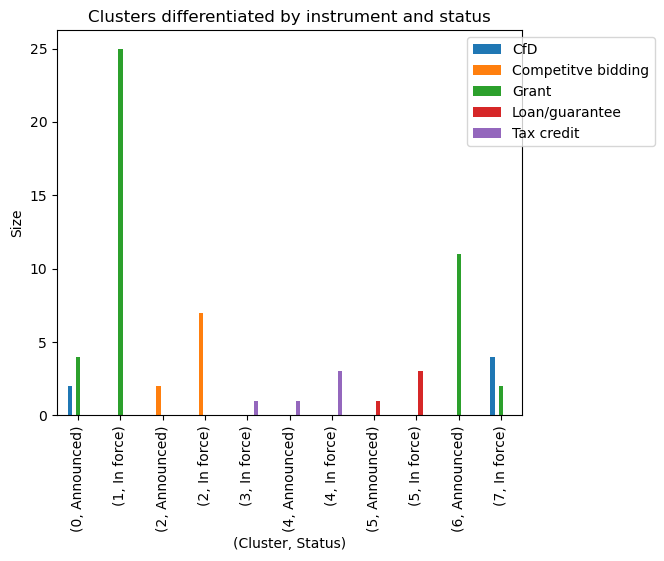

In [476]:
gh.groupby(by=['cluster','Instrument_type','Status']).size().unstack(level = 'Instrument_type', fill_value=0).plot.bar(title='Clusters differentiated by instrument and status',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Status)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

In [565]:
# Clustering with 5 clusters (which seems to be the best)

kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [567]:
print('Unique labels:', np.unique(kmeans5.labels_))

Unique labels: [0 1 2 3 4]


In [569]:
gh['cluster5'] = kmeans5.labels_
gh.head()

,Country,Status,Sector,Programme,Instrument_type,Policy_side,Amount_USD_mn,Description,cluster,cluster2,cluster5
0,Australia,In force,Hubs,Regional Hydrogen Hubs Programme,Grant,Pull,324.0,AUD 490 m (USD 324 m) for seven H₂ hubs (up to...,7,0,0
1,Australia,Announced,Electrolyser manufacturing,National Reconstruction Fund – H₂ equipment debt,Loan/guarantee,Push,2000.0,"Finance in the form of debt, equity and guaran...",5,4,4
2,Australia,Announced,Industry,Future Made in Australia programme,Tax credit,Push,10000.0,AUD 2/kg (USD 1.3/kg) incentive for up to 10 y...,4,5,1
3,Australia,In force,Industry,the Australian Headstart programme,CfD,Pull,2600.0,For projects with a cumulative electrolyser ca...,7,2,2
4,Australia,Announced,Industry,Future Made in Australia Innovation Fund,Grant,Push,1200.0,Includes “green” metals and low-carbon liquid ...,6,1,1


In [571]:
gh.groupby(by=['cluster5', 'Instrument_type']).size()

cluster5  Instrument_type   
0         CfD                    2
          Grant                  6
1         Grant                 36
          Tax credit             4
2         CfD                    4
          Competitve bidding     9
3         Tax credit             1
4         Loan/guarantee         4
dtype: int64

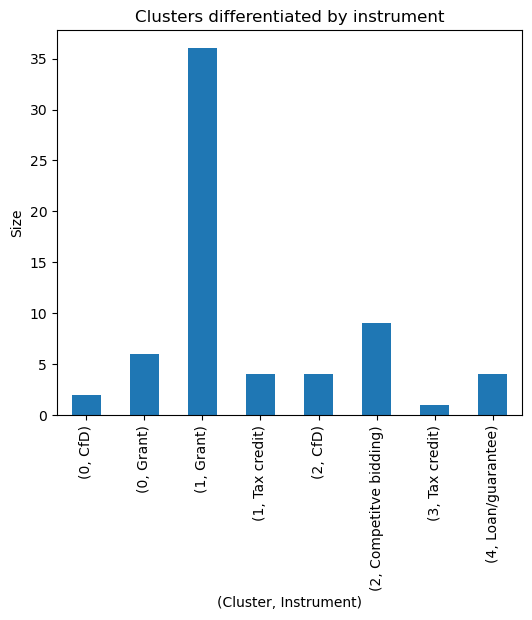

In [573]:
gh.groupby(by=['cluster5', 'Instrument_type']).size().plot.bar(title='Clusters differentiated by instrument',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Instrument)');

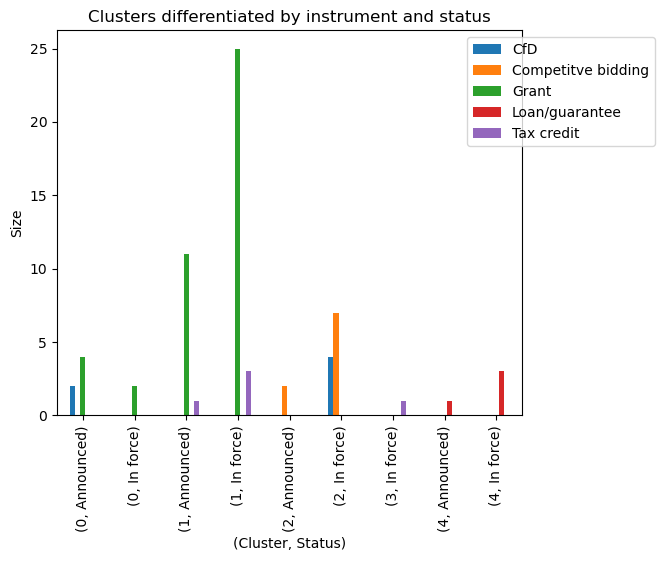

In [575]:
gh.groupby(by=['cluster5','Instrument_type','Status']).size().unstack(level = 'Instrument_type', fill_value=0).plot.bar(title='Clusters differentiated by instrument and status',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Status)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

# The mixed colours in the same bar may suggest that the two instruments within the same cluster may
# share some similarities

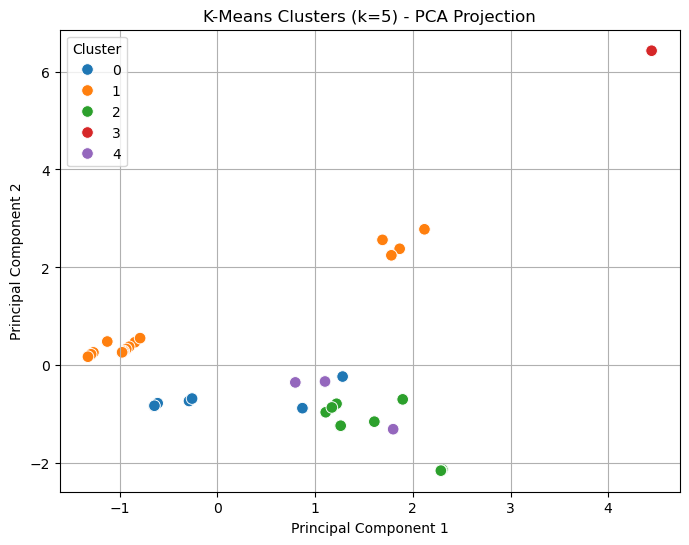

In [577]:
from sklearn.decomposition import PCA


# Reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)  # use your scaled feature data

# Predict cluster labels (if not already done)
labels = kmeans5.labels_

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='tab10', s=70)
plt.title('K-Means Clusters (k=5) - PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [547]:
import plotly.express as px


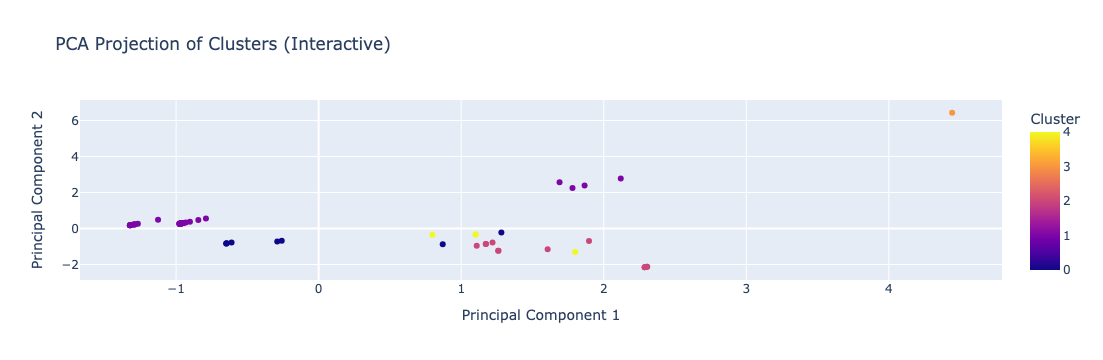

<Figure size 640x480 with 0 Axes>

In [579]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Step 2: Create a DataFrame for plotting
pca_df = pd.DataFrame({
    'PC1': pca_components[:, 0],
    'PC2': pca_components[:, 1],
    'Cluster': kmeans5.labels_
})

# Step 3: Plot with Plotly
fig = px.scatter(
    pca_df, x='PC1', y='PC2',
    color='Cluster',
    title='PCA Projection of Clusters (Interactive)',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
    color_discrete_sequence=px.colors.qualitative.Set2_r
)
fig.show()
plt.savefig('whateer')